In [76]:
#crushing Warnings
import warnings 
warnings.filterwarnings('ignore')

In [77]:
#Importing Relevant Packgaes 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
%matplotlib inline 

In [113]:
#checking Encodeing of Loan.csv file 
import chardet
import os
file = os.path.join(r"C:\Users\sanyukta.patki\OneDrive - Veritas Technologies LLC\Documents\personal\ML&AI(Masters)\Lessons\Others\loan\loan.csv")
data = open(file,'rb').readline()

encoding = chardet.detect(data)
print("file is encoded with:\n",encoding)

file is encoded with:
 {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [208]:
#Read Loan.csv file
loan_file = (r"C:\Users\sanyukta.patki\OneDrive - Veritas Technologies LLC\Documents\personal\ML&AI(Masters)\Lessons\Others\loan\loan.csv")
loan_data = pd.read_csv(loan_file,low_memory=False)

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [193]:
##Stripping off white_spaces from the column name(if any)
loan_data = loan_data.rename(columns= lambda x: x.strip(), inplace=False)

In [194]:
#removing rows with NaN value 
def dropnacolrow(df,val=1,percent=50):
    '''
    df is the dataframe that needs to be manipulated
    val :val = 0 represents drop rows , val =1 represents drop column (default value is 1 for column manipulation)
    percent is the total percentage value that will be used as threshold to see how much % of NaN values are there in the column
    '''
    
    df_newp = df.copy()
    
    if val == 1:
        columns_NA_percent = 100*df_newp.isnull().sum()/len(df_newp.index)
        list_NA_columns = list(columns_NA_percent[(columns_NA_percent> percent)].index)
        df_newp.drop(list_NA_columns, axis=1, inplace=True)
        print("Total number of dropped columns (with more than 50% missing values):",len(list_NA_columns))
        print("\nDropped column names are as follows:",list_NA_columns)
    else:
        rows_NA_percent = 100*df_newp.isnull().sum(axis=1)/len(df_newp.index)
        list_NA_rows = list(rows_NA_percent[(rows_NA_percent> percent)].index)
        df_newp.drop(list_NA_rows, axis=0, inplace=True)
        print("Total number of dropped rows (with more than 50% missing values):",len(list_NA_rows))
        print("\nDropped row names are as follows:",list_NA_rows)
        
    return df_newp

#Retaining the columns with <=50% missing values
loan_data = dropnacolrow(loan_data,val=1,percent=50)

Total number of dropped columns (with more than 50% missing values): 58

Dropped column names are as follows: ['Unnamed: 18', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_

In [195]:
#Retaining the rows with <=50% missing values
loan_data = dropnacolrow(loan_data,val=0,percent=50)

Total number of dropped rows (with more than 50% missing values): 0

Dropped row names are as follows: []


In [196]:
##Retaining the rows with <=50% missing values
loan_data = dropnacolrow(loan_data,val=0,percent=50)

Total number of dropped rows (with more than 50% missing values): 0

Dropped row names are as follows: []


In [197]:
loan_data.shape

(39717, 56)

In [198]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,16-Apr,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [199]:
#Creating a function to remove single value unique columns from the dataframe
def remove_single_val_uniq_col(df):
    df_newsingle = df.copy()
    
    uniq_svcol = df_newsingle.nunique() ==1
    list_uniq_svcol = list(uniq_svcol[uniq_svcol.values== True].index)
    df_newsingle.drop(list_uniq_svcol, axis=1, inplace=True)
    return df_newsingle

In [200]:
#Removing single value unique columns from the dataframe
loan_data = remove_single_val_uniq_col(loan_data)
loan_data.shape

(39717, 46)

In [201]:
##Removing duplicate rows (if any)
loan_data = loan_data.drop_duplicates()
loan_data.shape

(39717, 46)

In [202]:
loan_data.zip_code.head()


0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object

In [203]:
#Dropping the rows with null values in these columns
loan_data = loan_data[~(loan_data.title.isnull())]
missing_val_cols_prcnt = round(100*loan_data.isnull().sum()/len(loan_data.index),4)
missing_val_cols_prcnt[missing_val_cols_prcnt!=0]

emp_title                6.1880
emp_length               2.7049
desc                    32.5769
revol_util               0.1259
last_pymnt_d             0.1788
last_credit_pull_d       0.0050
pub_rec_bankruptcies     1.7554
dtype: float64

In [204]:
#Checking unique entries in pub_rec_bankruptcies
print(loan_data.pub_rec_bankruptcies.unique())
print(loan_data.pub_rec_bankruptcies.dtype)

[ 0.  1.  2. nan]
float64


In [205]:
##Percentage of unique values in 'pub_rec_bankruptcies' column
loan_data.pub_rec_bankruptcies.value_counts(dropna=False, normalize=True).mul(100).round(3)

0.0    94.011
1.0     4.216
NaN     1.755
2.0     0.018
Name: pub_rec_bankruptcies, dtype: float64

### Univariate Analysis and Segmented Univariate Analysis


#### Loan Status Analysis:

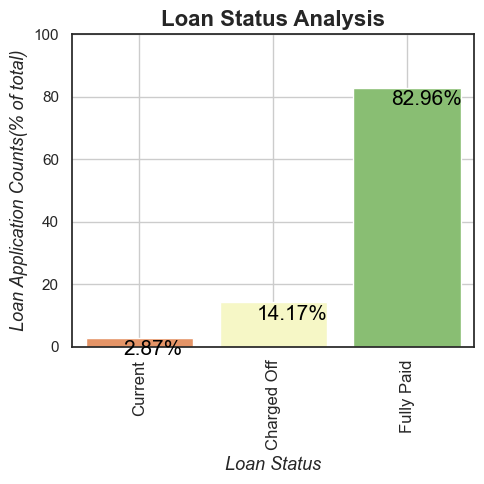

In [209]:

##Lets check how 'loan_status'(%) is distributed
sns.set(style='white')
plt.figure(figsize=(5,5), dpi=100)
br = pd.DataFrame(loan_data.loan_status.value_counts(normalize=True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'loan_status':'loan_status_count'})
ax = sns.barplot(x='index',y='loan_status_count', data=br, palette='RdYlGn')
ax.set_xticklabels(labels=['Current','Charged Off','Fully Paid'], rotation='vertical', fontsize=12)
plt.xlabel('Loan Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Loan Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.ylim(0,100)
plt.title('Loan Status Analysis', fontsize=16, fontweight='bold')

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.28, i.get_height()-5.5, \
            str(round((i.get_height()), 2))+"%", fontsize=15, color='black',\
            rotation=0)
    
plt.grid(True)
plt.tight_layout()
plt.show()

__Observation__ : 14.17 of total loan issues have been Charged OFF(Defaulted)

#### Loan Issue Year Analysis

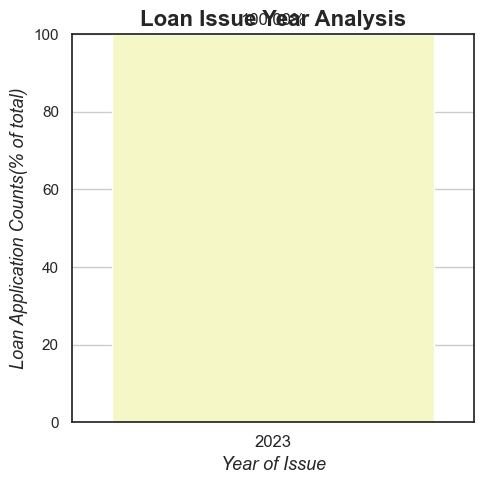

In [210]:
##Lets check the total number of approved applications by year

sns.set(style='white')
plt.figure(figsize=(5,5), dpi=100)
br = pd.DataFrame(loan_data.issue_d_year.value_counts(normalize = True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'issue_d_year':'issue_d_year_count'})
ax = sns.barplot(x='index',y='issue_d_year_count', data=br, palette='RdYlGn')

plt.xlabel('Year of Issue', fontsize= 13, fontstyle='italic')
plt.ylabel('Loan Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.title('Loan Issue Year Analysis', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylim(0,100)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.grid(True)
plt.tight_layout()
plt.show()

__Total% of approved loan applications by Month Analysis:__

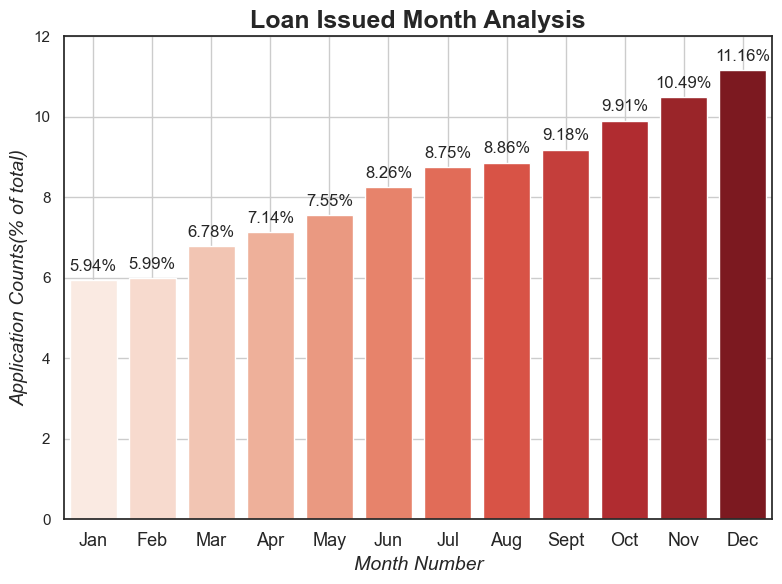

In [211]:
##Lets check the total percentage of approved loan applications by month

sns.set(style='white')
plt.figure(figsize=(8,6), dpi=100)
br = pd.DataFrame(loan_data.issue_d_month.value_counts(normalize = True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'issue_d_month':'issue_d_month_count'})
ax = sns.barplot(x='index',y='issue_d_month_count', data=br, palette='Reds')

plt.xlabel('Month Number', fontsize= 14, fontstyle='italic')
plt.ylabel('Application Counts(% of total)' , fontsize= 14, fontstyle='italic')
plt.ylim(0,12)
plt.title('Loan Issued Month Analysis', fontsize=18,fontweight='bold')

   

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(range(0,12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',\
                       'Sept','Oct','Nov','Dec'], fontsize=13)    
plt.grid(True)
plt.tight_layout()
plt.show()

__Observation__ The percentage (%) of loan approval is high during the end of the year. Maximum of 11.16% in the month of Decemeber. Hence, substantial demand for loans during this period.

__Loan Purpose Analysis:__

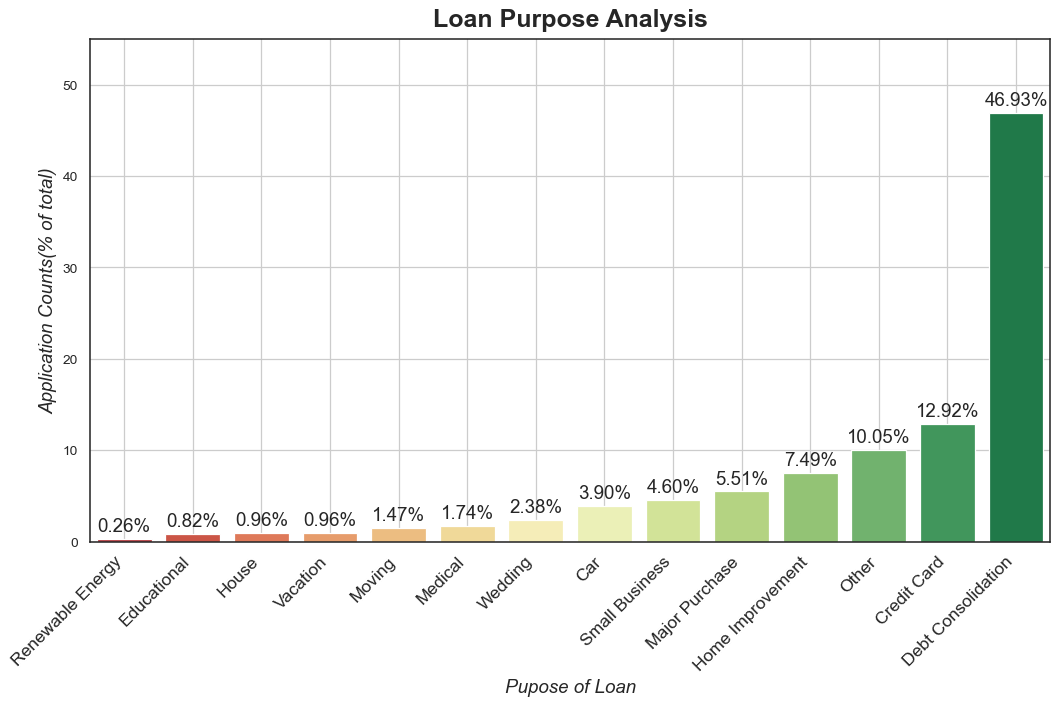

In [212]:
#Loan Purpose analysis
sns.set(style='white')
plt.figure(figsize=(12, 8),dpi = 90)
br = pd.DataFrame(loan_data.purpose.value_counts(normalize = True).mul(100).sort_values())

br.reset_index(inplace=True)
br = br.rename(columns =  {'index':'Loan_Purpose'} )

ax = sns.barplot(x='Loan_Purpose',y='purpose', data=br, palette='RdYlGn')
ax.set_xticklabels(labels=list(br.Loan_Purpose), fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Pupose of Loan', fontsize= 15, fontstyle='italic')
plt.ylabel('Application Counts(% of total)', fontsize= 15, fontstyle='italic')
plt.title('Loan Purpose Analysis', fontsize= 20, fontweight='bold', pad=10)
plt.ylim(0,55)
   
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), fontsize= 15, textcoords = 'offset points' )

plt.xticks(range(0,14),['Renewable Energy','Educational','House','Vacation','Moving','Medical','Wedding','Car',\
                       'Small Business','Major Purchase','Home Improvement','Other','Credit Card','Debt Consolidation'])    
plt.grid(True)
plt.tight_layout()
plt.show()

__Observation__ : Debt Consolidation is the major reason for requesting a loan, and second major reason is Credit Card.

__Address State Analysis(% wise) of Loan Applicants__

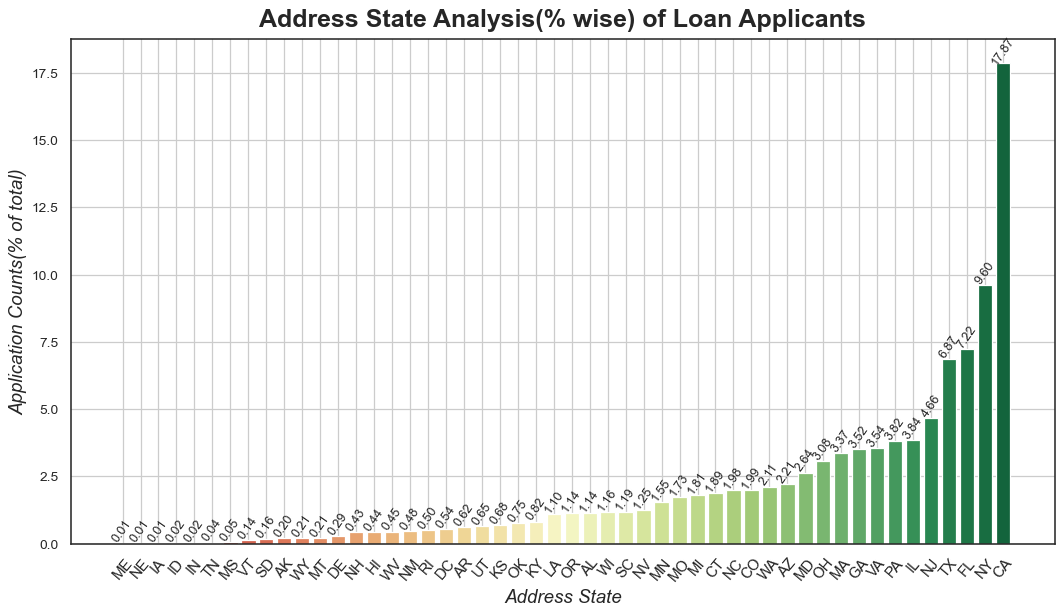

In [213]:
#Address State Analysis(% wise) of Loan Applicants
sns.set(style='white')
plt.figure(figsize=(12, 7),dpi = 90)
ad = pd.DataFrame(loan_data.addr_state.value_counts(normalize=True).mul(100).round(2).sort_values().to_frame('pct_count'))
ad.reset_index(inplace=True)
ad['states'] = ad['index']

ax_07 = sns.barplot(x='index',y='pct_count', data=ad, palette='RdYlGn')
ax_07.set_xticklabels(labels=list(ad.index), fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Address State', fontsize= 15, fontstyle='italic')
plt.ylabel('Application Counts(% of total)', fontsize= 15, fontstyle='italic')
plt.title('Address State Analysis(% wise) of Loan Applicants', fontsize= 20, fontweight='bold', pad=10)
plt.ylim(0,100)
   
for p in ax_07.patches:
    ax_07.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), fontsize= 10, textcoords = 'offset points', rotation=55 )
plt.xticks(range(0,50), list(ad.states), fontsize=12, rotation=50)
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

__Observation__: Maximum number of loan applicants were from CA with 17.88% followed by NY with 9.60

__Applicant's Loan amount analysis:__

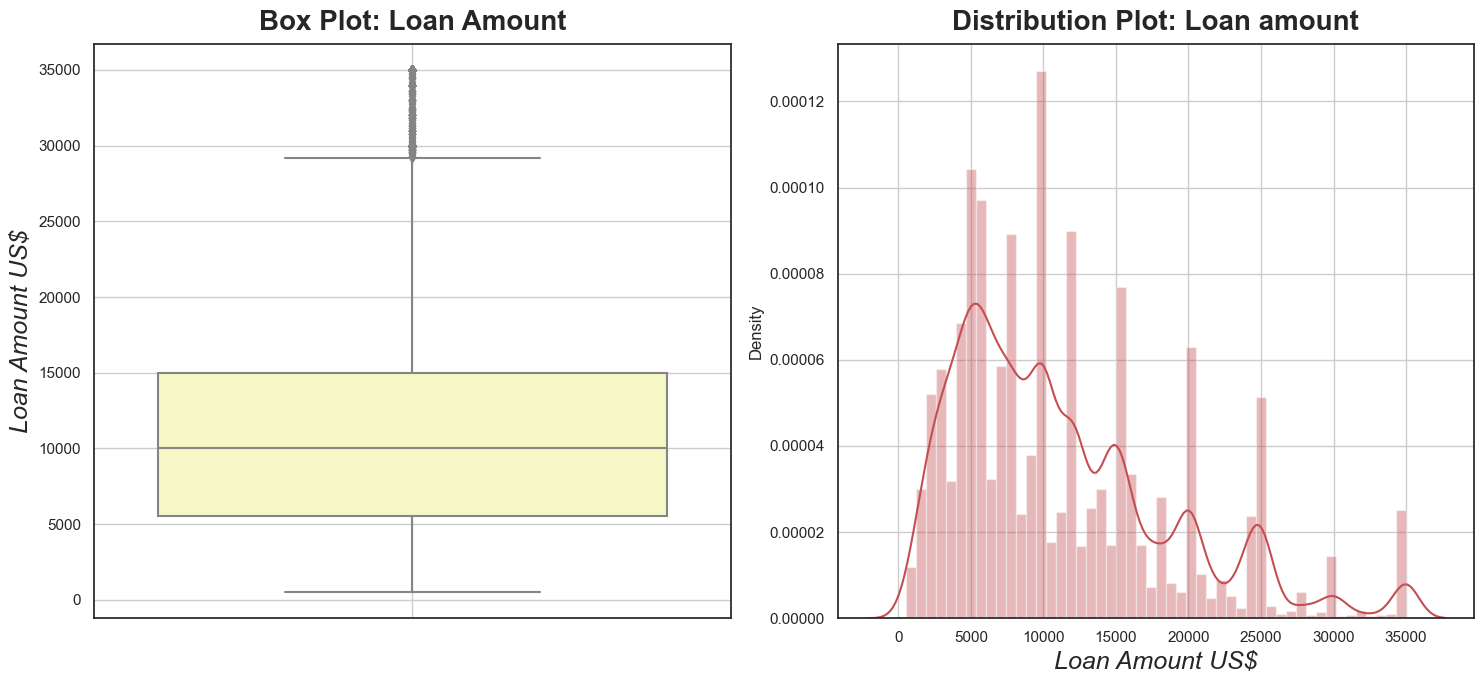

In [214]:
#Applicant's Loan amount analysis:
plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1, 2, 1)

sns.boxplot(y = loan_data.loan_amnt , palette='RdYlGn')
plt.title('Box Plot: Loan Amount', fontsize= 20, fontweight='bold', pad=10)
plt.ylabel('Loan Amount US$', fontsize= 18, fontstyle='italic')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.distplot(loan_data.loan_amnt , hist= True,color="r" )
plt.title('Distribution Plot: Loan amount', fontsize= 20, fontweight='bold', pad=10)
plt.xlabel('Loan Amount US$', fontsize= 18, fontstyle='italic')
plt.grid(True)

plt.tight_layout()
plt.show()

# Bivariate Analysis

### Classification of Variables 

In [215]:
#List of continuous variables
col_list_cont = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate',\
                        'installment','annual_inc','dti','pub_rec','pub_rec_bankruptcies']

In [216]:
#List of categorical variables
col_list_cont = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate',\
                        'installment','annual_inc','dti','pub_rec','pub_rec_bankruptcies']

col_list_cat = pd.DataFrame(loan_data.columns)
col_list_cat = col_list_cat[~(col_list_cat[0].isin(col_list_cont))]
col_list_cat

,0
0,id
1,member_id
5,term
8,grade
9,sub_grade
...,...
109,tax_liens
110,tot_hi_cred_lim
111,total_bal_ex_mort
112,total_bc_limit


##### 1. List of Continuous variables:

In [217]:
col_list_cont

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'pub_rec',
 'pub_rec_bankruptcies']

#### 2. List of Categorical Variables:

In [218]:
#Recall
col_list_cat

,0
0,id
1,member_id
5,term
8,grade
9,sub_grade
...,...
109,tax_liens
110,tot_hi_cred_lim
111,total_bal_ex_mort
112,total_bc_limit


#### Correlation Matrix: Heatmap

<Figure size 6000x6000 with 0 Axes>

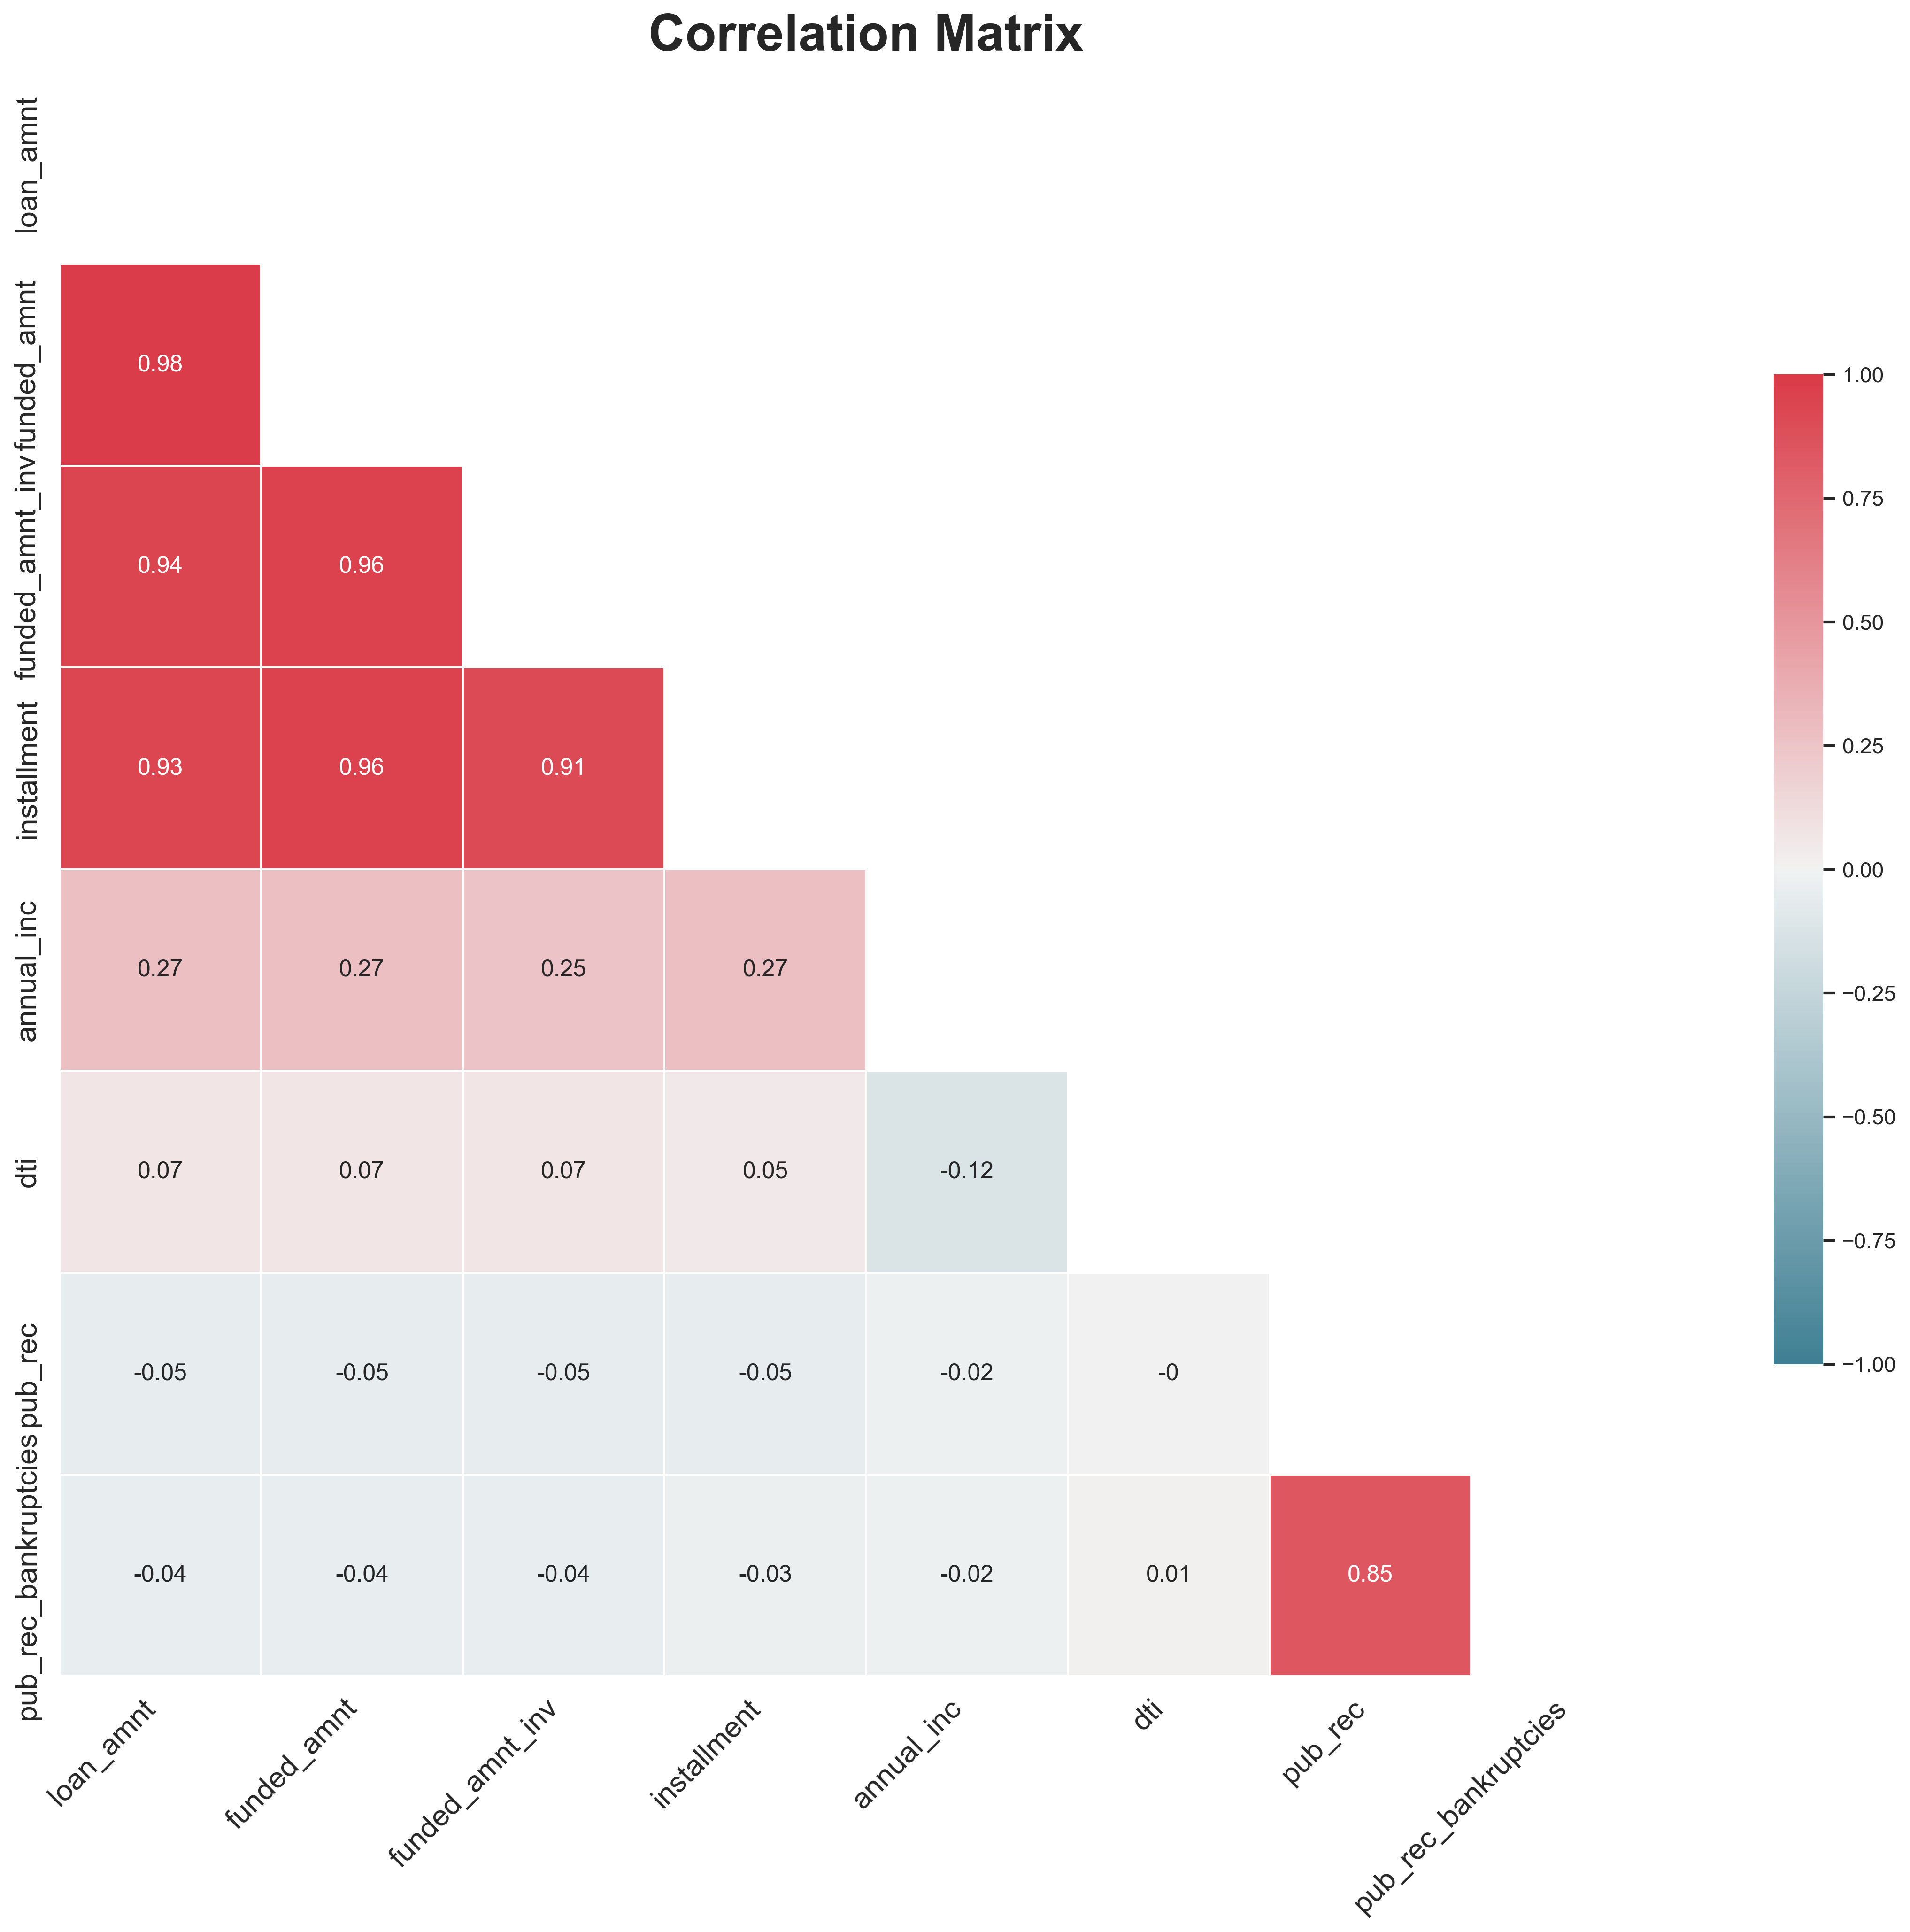

In [219]:
#Bivariate Analyis - Understanding the correlation of continuous variables
sns.set(style='white')
plt.figure (figsize=(20,20), dpi=300)
df_corr_plot1= loan_data.copy()
#Recall 'col_list_cont: list of columns containing continuous variables'
df_corr_plot1 = df_corr_plot1.loc[:,col_list_cont]
correlation_matrix1 = round(df_corr_plot1.corr(),2)
correlation_matrix1
mask = np.triu(np.ones_like(correlation_matrix1, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15), dpi=300)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(correlation_matrix1, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlation Matrix', fontsize=26, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.autoscale()
plt.tight_layout()
plt.show()

#### Defaulter Rate(%) as per 'Grade' and Loan Status Analysis

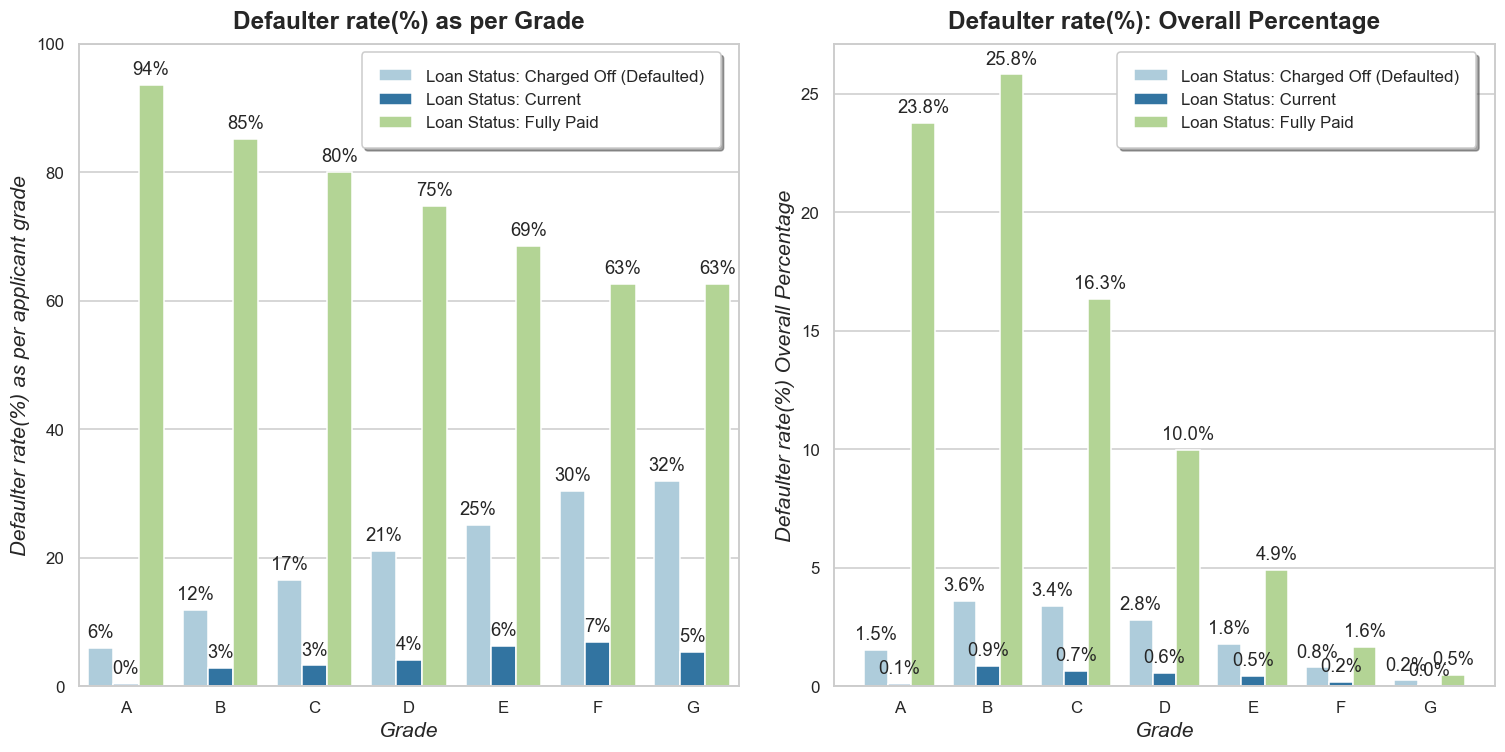

In [220]:
#Defaulter Rate(%) as per 'grade' analysis. Finding the defaulter rate (%) using 'grade' and 'loan_status' variables.
grade_ls = loan_data.loc[:,['grade','loan_status']]
grade_ls_gpby = grade_ls.groupby(['grade','loan_status']).size().to_frame('c_gls')
grade_ls_gpby.reset_index(inplace=True)
grade_ls_gpby['pct_count_gwise']= ""
grade_ls_gpby['c_gls'] = grade_ls_gpby['c_gls'].astype('int')


A = grade_ls_gpby[grade_ls_gpby.grade=='A']
A.pct_count_gwise = round(100*A['c_gls']/A['c_gls'].sum(),2)
B = grade_ls_gpby[grade_ls_gpby.grade=='B']
B.pct_count_gwise = round(100*B['c_gls']/B['c_gls'].sum(),2)
C = grade_ls_gpby[grade_ls_gpby.grade=='C']
C.pct_count_gwise = round(100*C['c_gls']/C['c_gls'].sum(),2)
D = grade_ls_gpby[grade_ls_gpby.grade=='D']
D.pct_count_gwise = round(100*D['c_gls']/D['c_gls'].sum(),2)
E = grade_ls_gpby[grade_ls_gpby.grade=='E']
E.pct_count_gwise = round(100*E['c_gls']/E['c_gls'].sum(),2)
F = grade_ls_gpby[grade_ls_gpby.grade=='F']
F.pct_count_gwise = round(100*F['c_gls']/F['c_gls'].sum(),2)
G = grade_ls_gpby[grade_ls_gpby.grade=='G']
G.pct_count_gwise = round(100*G['c_gls']/G['c_gls'].sum(),2)

grade_ls_final = pd.concat([A,B,C,D,E,F,G])
#plot
sns.set(style='whitegrid')
plt.figure(figsize=(14,7), dpi=110)

#subplot 1
plt.subplot(121)
ax_G = sns.barplot(x=grade_ls_final.grade, y=grade_ls_final.pct_count_gwise, hue=grade_ls_final.loan_status, palette='Paired')
plt.xlabel('Grade', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) as per applicant grade', fontsize= 14, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter rate(%) as per Grade',fontsize= 16, fontweight='bold', pad=10)
#Legend
A= ax_G.legend(loc='upper center', bbox_to_anchor=(0.70, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
A.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')
A.get_texts()[1].set_text('Loan Status: Current')
A.get_texts()[2].set_text('Loan Status: Fully Paid')


#Display values
for p in ax_G.patches:
    ax_G.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')

#subplot 2 
plt.subplot(122)
grade_ls_final['pct_count_of_total']= round(100*grade_ls_final['c_gls']/grade_ls_final['c_gls'].sum(),2)

ax_T = sns.barplot(x=grade_ls_final.grade, y=grade_ls_final.pct_count_of_total, hue=grade_ls_final.loan_status, palette='Paired')
plt.xlabel('Grade', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) Overall Percentage', fontsize= 14, fontstyle='italic')
plt.title('Defaulter rate(%): Overall Percentage',fontsize= 16, fontweight='bold', pad=10)
#Legend
T= ax_T.legend(loc='upper center', bbox_to_anchor=(0.70, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
T.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')
T.get_texts()[1].set_text('Loan Status: Current')
T.get_texts()[2].set_text('Loan Status: Fully Paid')

#Display values
for p in ax_T.patches:
    ax_T.annotate(format(p.get_height(), '.1f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), fontsize=12, textcoords = 'offset points')

plt.tight_layout()
plt.autoscale()
plt.show()

__Observations:__
(i) (From left graph): The percentage of defaulters is significantly high within the categories, 'F' and 'G'.
(ii)(From the overall percentage graph) largest % of approved loan defaulters belong to Grade 'B'(3.6%) and 'C'(3.4%) category.

#### Rate(%) Verification Status (Among Defaulters)

In [221]:
#Check unique items in 'verification_status' column
loan_data.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [223]:
#Finding the defaulters(%) according to 'verification_status' variable. (loan status->charged off i.e. '1')
verf_1 = loan_data.loc[:,['verification_status','loan_status']]
#Considering only the defaulters (charged off='1')
verf_1 = verf_1[verf_1.loan_status=='1']
#Retaining only the values known
verf_1_final = verf_1.groupby(['verification_status','loan_status']).size().to_frame('c_vls')
verf_1_final.reset_index(inplace=True)
verf_1_final['c_vls'] = verf_1_final['c_vls'].astype('int')
verf_1_final

#Plot
sns.set(style='white')
plt.figure(figsize=(6,7.5), dpi=100)

verf_1_final['pct_count_of_total']= round(100*verf_1_final['c_vls']/verf_1_final['c_vls'].sum(),2)
ax_K2 = sns.barplot(x=verf_1_final.verification_status, y=verf_1_final.pct_count_of_total, hue=verf_1_final.loan_status, palette='Set1')
plt.xlabel('Applicant Verification Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Defaulters(%): Verification Status among defaulters', fontsize= 13, fontstyle='italic')
plt.ylim(0,100)
plt.title('Rate(%) Verification Status (Among Defaulters)',fontsize= 14, fontweight='bold', pad=10)
#Legend
L2= ax_K2.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
L2.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_K2.patches:
    ax_K2.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), fontsize=13, textcoords = 'offset points')  
plt.xticks([0,1,2],['Verified', 'Source Verified', 'Not Verified'])
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 600x750 with 0 Axes>

## Conlusion 


__(1) Loan Term:__ Average Interest rate for defaulted applications is very high with 12.38 % for 36 months and 15.75 % for 60 months term.

__(2) Grade:__ Default Rate is high in high risk loan applicants. It would be important for LC to thoroughly vet high risk loan applications.

__(3) Loan Purpose:__ The top two reasons for loans are debt consolidation and credit card. Such applications should be carefully assessed.

__(4) Loan Issue Month:__ The most common month the loan is issued is December.